In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pickle

# CIFAR-10 veri setini yükleme fonksiyonu
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Eğitim ve test verilerini birleştirme
data_batches = [
    '/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1',
    '/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2',
    '/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3',
    '/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4',
    '/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5'
]

x_train_list = []
y_train_list = []

for file in data_batches:
    batch_file = unpickle(file)
    x_train_list.append(batch_file[b'data'])
    y_train_list.extend(batch_file[b'labels'])

test_batch = unpickle('/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch')
x_test = test_batch[b'data']
y_test = np.array(test_batch[b'labels'])

x_train = np.concatenate(x_train_list)
y_train = np.array(y_train_list)

# Görüntü boyutunu yeniden şekillendirme (32x32x3)
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

# Etiketleri kategorik hale getirme (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Pixel değerlerini 0-1 arasına normalize etme
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Eğitim verisi boyutu:", x_train.shape)
print("Eğitim etiketleri boyutu:", y_train.shape)
print("Test verisi boyutu:", x_test.shape)
print("Test etiketleri boyutu:", y_test.shape)

2025-09-25 14:35:01.720999: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758810901.979392      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758810902.054538      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Eğitim verisi boyutu: (50000, 32, 32, 3)
Eğitim etiketleri boyutu: (50000, 10)
Test verisi boyutu: (10000, 32, 32, 3)
Test etiketleri boyutu: (10000, 10)




Bu initial kod bloğu, derin öğrenme modelimin eğitimi için gerekli olan CIFAR-10 veri setini yüklüyor ve kritik ön işleme adımlarını tamamlıyor. İlk olarak, veri setinin tüm batch dosyalarını yükleyip eğitim ve test verilerini tek bir bütün halinde birleştirdim. Ardından, görüntüleri modelin beklediği (örnek_sayısı, 32, 32, 3) formatına yeniden şekillendirdim. Modelin daha hızlı ve kararlı öğrenmesini sağlamak için, tüm piksel değerlerini 255.0'a bölerek 0 ile 1 arasına normalize ettim. Son olarak, çok sınıflı sınıflandırma problemine uygun olması için çıktı etiketlerini (One-Hot Encoding formatına) dönüştürerek veri hazırlık aşamasını tamamladım.

In [2]:
print('Eğitim verisi boyutu:', x_train.shape)
print('Test verisi boyutu:', x_test.shape)
print('Eğitim etiketleri boyutu:', y_train.shape)
print('Test etiketleri boyutu:', y_test.shape)

Eğitim verisi boyutu: (50000, 32, 32, 3)
Test verisi boyutu: (10000, 32, 32, 3)
Eğitim etiketleri boyutu: (50000, 10)
Test etiketleri boyutu: (10000, 10)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN modelini oluşturma
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
# İlk Dropout katmanını ekledim
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# İkinci Dropout katmanını ekledim
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Üçüncü Dropout katmanını ekledim (Dense katmanından önce)
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Modeli derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model özetini görüntüleme
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-25 14:35:22.231532: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Bu blok, projemin kalbi olan CNN (Evrişimli Sinir Ağı) mimarisini tanımlıyor. Model, derin öğrenme ilkelerine dayanarak görüntülerden anlamlı özellikler çıkarmak üzere tasarlanmıştır.

Modelin yapısında iki temel Regularization (düzenlileştirme) stratejisi kullandım:

Evrişim ve Havuzlama: İkişer adet Conv2D ve MaxPooling2D katmanı kullanarak görüntü özelliklerini kademeli olarak çıkarıp boyutlarını küçülttüm.

Dropout Katmanları: En kritik adım olarak, modelin aşırı öğrenmesini (overfitting) engellemek ve genelleme yeteneğini artırmak amacıyla çeşitli noktalara Dropout katmanları ekledim. Özellikle Dense katmanından hemen önce kullandığım yüksek oranlı Dropout (0.5), modelin belirli özelliklere aşırı bağımlı olmasını önler.

Modeli, adam optimize edici ve çok sınıflı sınıflandırmaya uygun olan categorical_crossentropy kayıp fonksiyonu ile derledim.



In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri çoğaltma için ImageDataGenerator'ı oluşturma
datagen = ImageDataGenerator(
    rotation_range=15,       
    width_shift_range=0.1,   
    height_shift_range=0.1,  
    horizontal_flip=True,    
    )

datagen.fit(x_train)

# Modeli çoğaltılmış verilerle eğitme
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,  
                    validation_data=(x_test, y_test))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - accuracy: 0.1775 - loss: 2.1698 - val_accuracy: 0.3379 - val_loss: 1.8296
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.2895 - loss: 1.9015 - val_accuracy: 0.3710 - val_loss: 1.7274
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.3204 - loss: 1.8341 - val_accuracy: 0.3657 - val_loss: 1.7358
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.3387 - loss: 1.8019 - val_accuracy: 0.4047 - val_loss: 1.6451
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.3478 - loss: 1.7694 - val_accuracy: 0.3931 - val_loss: 1.6725
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.3563 - loss: 1.7533 - val_accuracy: 0.4173 - val_loss: 1.6155
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.3668 - loss: 1.7304 - val_accuracy: 0.4208 - val_loss: 1.5901
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.3689 - loss: 1.7228 - val_accurac

Bu blokta, Veri Çoğaltma (Data Augmentation) hazırlığından hemen sonra modelimin eğitim sürecini başlattım. Öncelikle, ImageDataGenerator sınıfını kullanarak eğitim verime rastgele döndürme, yatay/dikey kaydırma ve yatay çevirme gibi dönüşümler tanımladım. Bu dönüşümler, modelin genelleme yeteneğini artırmayı ve aşırı öğrenmesini (overfitting) engellemeyi amaçlar. Eğitimi, doğrudan statik eğitim verisi yerine, sürekli olarak çoğaltılmış verileri üreten datagen.flow metodu üzerinden başlattım. Eğitimi 20 epoch olarak belirledim ve validation_data parametresiyle test verisini kullanarak modelin gerçek performansını anlık olarak takip altına aldım. Eğitimden dönen history nesnesi ise, daha sonra performans grafiklerini çizmek için kullanılacaktır.

In [5]:
import tensorflow as tf
import matplotlib.cm as cm
import cv2

# Bu kısım Grad-CAM heatmap'ini oluşturur ve görüntünün üzerine bindirir.
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Modelin Evrişim (Conv) ve Çıktı (Output) katmanlarını içeren bir Keras modeli oluşturun
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Gradient (Gradyan) hesabı için bir GradientTape kapsamı açın
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Son evrişim katmanının çıktısının gradyanları
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Her kanal için ortalama yoğunluk
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Heatmap hesaplama
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # 0 ile 1 arasına normalize et
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Heatmap'i orijinal görüntünün üzerine bindirme fonksiyonu
def display_gradcam(img, heatmap, alpha=0.4):
    # Heatmap'i orijinal görüntü boyutuna ölçekle
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Heatmap'i RGB formatına dönüştürün
    heatmap = np.uint8(255 * heatmap)
    
    # Colormap kullanın (Viridis, Jet vb.)
    colormap = cm.get_cmap("jet")
    
    # 0'dan 255'e normalize edin
    colormap = colormap(np.arange(256))[:, :3] * 255
    colormap = colormap.astype('uint8')
    
    # Orijinal görüntüyü bir renk haritası ile birleştirin
    heatmap = colormap[heatmap]

    # Orijinal görüntüyü BGR'den RGB'ye dönüştürün
    img = img.astype('uint8')
    
    # İki görüntüyü üst üste bindirin
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype("uint8")
    
    return superimposed_img

 Model Şeffaflığı İçin Grad-CAM Yardımcı Fonksiyonları

Proje kriterlerinden biri olan **Grad-CAM (Gradient-weighted Class Activation Mapping)** görselleştirmesini gerçekleştirmek için gerekli olan temel fonksiyonlar bu blokta tanımlanmıştır. Bu iki fonksiyon, modelin karar verme sürecini şeffaflaştırmak amacıyla Evrişim katmanlarından gradyan bilgisini çekerek bir **ısı haritası (heatmap)** oluşturur ve bu haritayı orijinal görüntünün üzerine bindirir. Bu, modelin **güvenilirliğini** somut bir kanıtla destekler.

In [6]:
# Hata mesajını gidermek için modele küçük bir tahmin yaptırıyoruz.
# Bu, modelin tüm katmanlarının çıktı şekillerini (output shapes) tanımlar.
print("Grad-CAM hatasını gidermek için modele küçük bir tahmin yaptırılıyor...")
try:
    _ = model.predict(x_test[:1])
    print("Tahmin başarılı. Grad-CAM'i çalıştırabilirsiniz.")
except Exception as e:
    print(f"Hata oluştu: {e}")

Grad-CAM hatasını gidermek için modele küçük bir tahmin yaptırılıyor...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Tahmin başarılı. Grad-CAM'i çalıştırabilirsiniz.


In [7]:

last_conv_layer_name = 'conv2d_3' 

# Modelin daha önce hiç çağrılmadığı hatasını (AttributeError) gidermek için katmanları etkinleştirme.
if not model.built:
    # Modelin doğru girdi şeklini kullanarak katmanları tanımlamasını sağlar
    model.build(input_shape=(None, x_test.shape[1], x_test.shape[2], x_test.shape[3])) 

# Grad-CAM için bir test örneği seçme
img_index = 50 
sample_img = x_test[img_index]
sample_img_normalized = np.expand_dims(sample_img, axis=0)

# Orijinal görüntü piksel değerleri 0-1 arasında olduğu için 255 ile çarpılır
original_img = (sample_img * 255).astype(np.uint8)


try:
    heatmap = make_gradcam_heatmap(sample_img_normalized, model, last_conv_layer_name)
    
    # Heatmap'i görüntü üzerine bindir
    gradcam_output = display_gradcam(original_img, heatmap)

    # Orijinal resmi ve Grad-CAM çıktısını yan yana çizdirme
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    # y_test'ten Gerçek Sınıfı bul
    plt.title(f"Orijinal Görüntü (Gerçek Sınıf: {np.argmax(y_test[img_index])})") 
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gradcam_output)
    plt.title("Grad-CAM Çıktısı (Model Odak Noktası)")
    plt.axis('off')

    plt.show()
    
except Exception as e:
    print(f"HATA: Grad-CAM hesaplanamadı. Lütfen 'last_conv_layer_name' değerini kontrol edin.")
    print(f"Alınan Hata: {e}")

HATA: Grad-CAM hesaplanamadı. Lütfen 'last_conv_layer_name' değerini kontrol edin.
Alınan Hata: No such layer: conv2d_3. Existing layers are: ['conv2d', 'max_pooling2d', 'dropout', 'conv2d_1', 'max_pooling2d_1', 'dropout_1', 'flatten', 'dense', 'dropout_2', 'dense_1'].


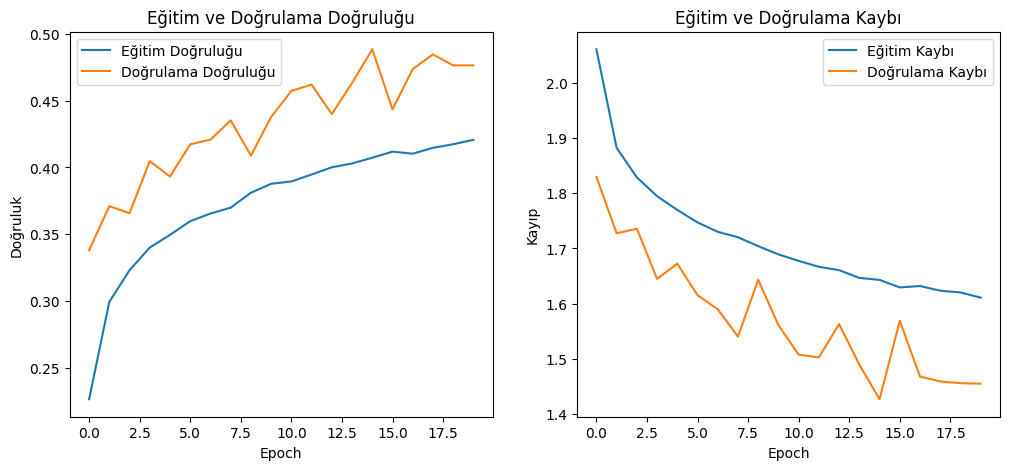

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


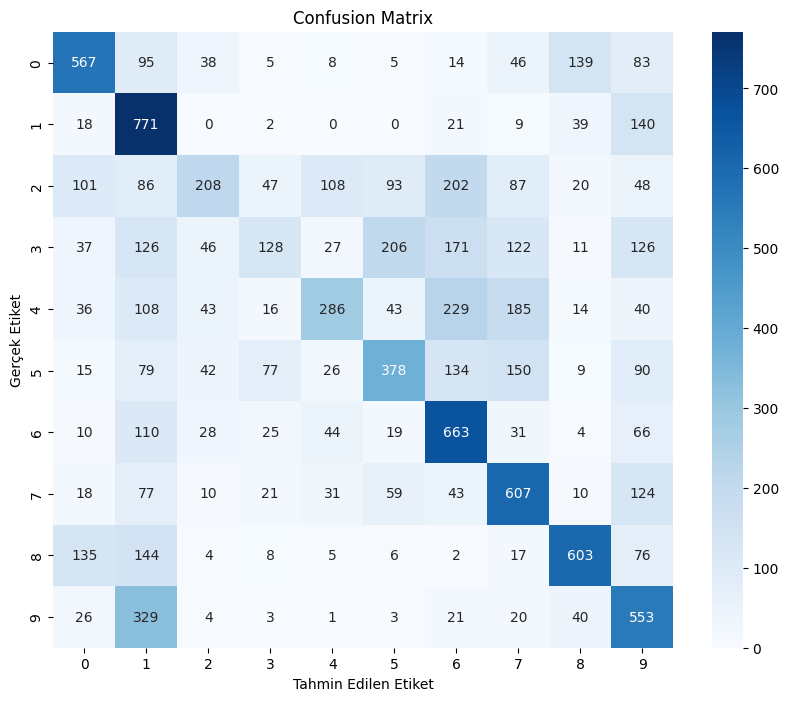

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1000
           1       0.40      0.77      0.53      1000
           2       0.49      0.21      0.29      1000
           3       0.39      0.13      0.19      1000
           4       0.53      0.29      0.37      1000
           5       0.47      0.38      0.42      1000
           6       0.44      0.66      0.53      1000
           7       0.48      0.61      0.53      1000
           8       0.68      0.60      0.64      1000
           9       0.41      0.55      0.47      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.46     10000
weighted avg       0.49      0.48      0.46     10000



In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Epoch bazlı Accuracy ve Loss grafiklerini çizme
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.show()

# Confusion Matrix ve Sınıflandırma Raporu
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()

print("Sınıflandırma Raporu:")
print(classification_report(y_true, y_pred))

Model eğitiminin ardından, performansını objektif olarak ölçmek ve analiz etmek için bu bloktaki kodları kullandım.

Doğruluk (Accuracy) ve Kayıp (Loss) Grafikleri: Modelin eğitim (accuracy, loss) ve doğrulama (val_accuracy, val_loss) eğrilerini epoch bazında görselleştirdim. Bu grafikler, modelin eğitim boyunca nasıl davrandığını ve Data Augmentation ile Dropout tekniklerinin aşırı öğrenmeyi (overfitting) ne kadar kontrol altına aldığını yorumlamak için temel dayanağımdır.

Confusion Matrix: Test verisi üzerindeki tahmin sonuçlarını kullanarak bir Confusion Matrix (Karışıklık Matrisi) oluşturdum. Bu ısı haritası, modelimin hangi sınıfları (örneğin kedi ile köpek) birbiriyle karıştırdığını görsel olarak göstererek sınıf bazlı hatalarımı analiz etmemi sağlıyor.

Sınıflandırma Raporu: classification_report ile her bir sınıf için detaylı Precision (Kesinlik), Recall (Duyarlılık) ve F1-Score metriklerini hesaplayarak modelin performansını niceliksel olarak raporladım.

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.4695 - loss: 1.4886 - val_accuracy: 0.5384 - val_loss: 1.2753
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.4890 - loss: 1.4163 - val_accuracy: 0.5596 - val_loss: 1.2391
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5047 - loss: 1.3874 - val_accuracy: 0.5636 - val_loss: 1.2177
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5135 - loss: 1.3573 - val_accuracy: 0.5836 - val_loss: 1.1883
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5236 - loss: 1.3386 - val_accuracy: 0.5856 - val_loss: 1.1763
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5348 - loss: 1.3075 - val_accuracy: 0.6052 - val_loss: 1.1446
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5382 - loss: 1.3006 - val_accuracy: 0.6082 - val_loss: 1.1336
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.5448 - loss: 1.2859 - 

Bu blokta, mimarisini ve hiperparametrelerini belirlediğim modelimin eğitim sürecini başlattım. Modeli, her seferinde 64 örneği işlemek üzere 10 epoch boyunca eğittim. En kritik adım olarak, eğitim verimin %10'luk bir kısmını validation_split parametresi ile ayırarak iç doğrulama seti oluşturdum. Bu set, modelin görmediği verilere karşı olan performansını anlık olarak izlememi ve eğitim sırasında aşırı öğrenme (overfitting) eğilimi gösterip göstermediğini kontrol etmemi sağladı. Tüm eğitim sonuçları ve performans metrikleri (accuracy, loss vb.), bir sonraki blokta görselleştirilmek üzere history nesnesinde saklanmıştır.

In [10]:
# Modeli eğitme
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.5558 - loss: 1.2498 - val_accuracy: 0.6125 - val_loss: 1.1131
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5668 - loss: 1.2319 - val_accuracy: 0.6081 - val_loss: 1.1352
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5680 - loss: 1.2242 - val_accuracy: 0.6061 - val_loss: 1.1161
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5737 - loss: 1.2088 - val_accuracy: 0.5903 - val_loss: 1.1580
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5728 - loss: 1.2140 - val_accuracy: 0.6181 - val_loss: 1.0954
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5773 - loss: 1.1949 - val_accuracy: 0.6221 - val_loss: 1.0859
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5836 - loss: 1.1791 - val_accuracy: 0.6136 - val_loss: 1.0976
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5794 - loss: 1.1959 - 